In [1]:
'''This Script is to simulate customer behaviour in a supermarket on all 5 days'''

# Libraries for data reading,cleaning, wrangling, aggregation
import os
import pandas as pd
import numpy as np
from datetime import datetime

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
#read all files
for file in os.listdir("data"):
    print(file)

friday.csv
monday.csv
thursday.csv
tuesday.csv
wednesday.csv


In [3]:
#store all csv into a dataframe
df_list = []
for file in os.listdir("data"):
    if file.endswith(".csv"):
        df = pd.read_csv(f"data/{file}", sep=";", parse_dates=True)
        df_list.append(df)
df = pd.concat(df_list, sort=True)

In [4]:
df

,customer_no,location,timestamp
0,1,dairy,2019-09-06 07:00:00
1,2,drinks,2019-09-06 07:00:00
2,3,fruit,2019-09-06 07:00:00
3,2,checkout,2019-09-06 07:01:00
4,4,drinks,2019-09-06 07:01:00
...,...,...,...
5045,1528,spices,2019-09-04 21:48:00
5046,1520,dairy,2019-09-04 21:49:00
5047,1529,dairy,2019-09-04 21:49:00
5048,1530,fruit,2019-09-04 21:49:00


In [5]:
df['timestamp']= pd.to_datetime(df['timestamp'])

In [6]:
df['day']= df['timestamp'].dt.day_name()
df['hours'] = df['timestamp'].dt.hour
df['time']=df['timestamp'].dt.time
df["customer_id"] = df["day"] + "-" + df["customer_no"].astype(str)
df.head()

,customer_no,location,timestamp,day,hours,time,customer_id
0,1,dairy,2019-09-06 07:00:00,Friday,7,07:00:00,Friday-1
1,2,drinks,2019-09-06 07:00:00,Friday,7,07:00:00,Friday-2
2,3,fruit,2019-09-06 07:00:00,Friday,7,07:00:00,Friday-3
3,2,checkout,2019-09-06 07:01:00,Friday,7,07:01:00,Friday-2
4,4,drinks,2019-09-06 07:01:00,Friday,7,07:01:00,Friday-4


In [7]:
lt=df.groupby(['location','hours'])['customer_no','day'].count()
lt

customer_no  day
location hours                  
checkout 7              454  454
         8              677  677
         9              455  455
         10             427  427
         11             342  342
...                     ...  ...
spices   17             269  269
         18             346  346
         19             389  389
         20             246  246
         21             122  122

[75 rows x 2 columns]

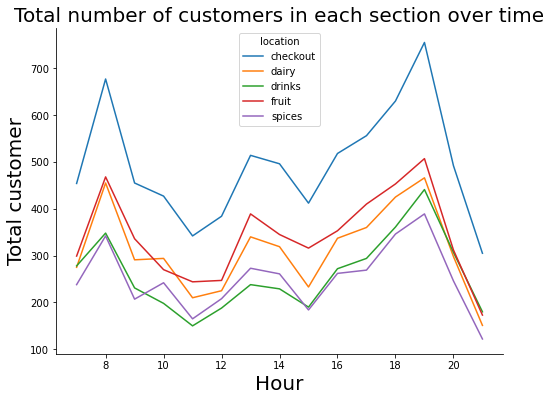

In [8]:
fig, ax=plt.subplots(figsize=(8, 6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Hour', fontsize=20)
plt.ylabel('Total customer', fontsize=20)


plt.title('Total number of customers in each section over time',fontsize=20)

sns.lineplot(x='hours',y='customer_no',hue='location',data=lt)
#plt.axis('off')
plt.show()

In [9]:
entry_datetime=df[['timestamp','customer_no']].groupby('customer_no').min()
entry_datetime

,timestamp
customer_no,
1,2019-09-02 07:03:00
2,2019-09-02 07:03:00
3,2019-09-02 07:04:00
4,2019-09-02 07:04:00
5,2019-09-02 07:04:00
...,...
1531,2019-09-04 21:46:00
1532,2019-09-05 21:48:00
1533,2019-09-05 21:48:00


In [10]:
entry_datetime=df[['timestamp','customer_no']].groupby('customer_no').min()
entry_datetime

,timestamp
customer_no,
1,2019-09-02 07:03:00
2,2019-09-02 07:03:00
3,2019-09-02 07:04:00
4,2019-09-02 07:04:00
5,2019-09-02 07:04:00
...,...
1531,2019-09-04 21:46:00
1532,2019-09-05 21:48:00
1533,2019-09-05 21:48:00


In [11]:
entry_datetime.rename(columns={'timestamp':'entry_time'},inplace=True)
entry_datetime.sort_values('entry_time')

,entry_time
customer_no,
1,2019-09-02 07:03:00
2,2019-09-02 07:03:00
3,2019-09-02 07:04:00
4,2019-09-02 07:04:00
5,2019-09-02 07:04:00
...,...
1530,2019-09-04 21:46:00
1533,2019-09-05 21:48:00
1534,2019-09-05 21:48:00


In [12]:
exit_datetime=df[['timestamp','customer_no']].groupby('customer_no').max()
exit_datetime

,timestamp
customer_no,
1,2019-09-06 07:05:00
2,2019-09-06 07:01:00
3,2019-09-06 07:11:00
4,2019-09-06 07:02:00
5,2019-09-06 07:15:00
...,...
1531,2019-09-05 21:46:00
1532,2019-09-05 21:48:00
1533,2019-09-05 21:48:00


In [13]:
exit_datetime.rename(columns={'timestamp':'exit_time'},inplace=True)
exit_datetime.sort_values('exit_time')

,exit_time
customer_no,
1511,2019-09-05 21:32:00
1512,2019-09-05 21:33:00
1520,2019-09-05 21:33:00
1514,2019-09-05 21:33:00
1516,2019-09-05 21:33:00
...,...
1509,2019-09-06 21:50:00
1510,2019-09-06 21:50:00
1500,2019-09-06 21:50:00


In [14]:
customer_timespent=pd.concat([entry_datetime,exit_datetime],axis=1)
customer_timespent

,entry_time,exit_time
customer_no,,
1,2019-09-02 07:03:00,2019-09-06 07:05:00
2,2019-09-02 07:03:00,2019-09-06 07:01:00
3,2019-09-02 07:04:00,2019-09-06 07:11:00
4,2019-09-02 07:04:00,2019-09-06 07:02:00
5,2019-09-02 07:04:00,2019-09-06 07:15:00
...,...,...
1531,2019-09-04 21:46:00,2019-09-05 21:46:00
1532,2019-09-05 21:48:00,2019-09-05 21:48:00
1533,2019-09-05 21:48:00,2019-09-05 21:48:00


In [15]:
default_exit_time = pd.to_datetime("21:51:00").time()
default_exit_time

datetime.time(21, 51)

In [16]:
customer_timespent['exit_time'].fillna(default_exit_time,inplace=True)
customer_timespent

,entry_time,exit_time
customer_no,,
1,2019-09-02 07:03:00,2019-09-06 07:05:00
2,2019-09-02 07:03:00,2019-09-06 07:01:00
3,2019-09-02 07:04:00,2019-09-06 07:11:00
4,2019-09-02 07:04:00,2019-09-06 07:02:00
5,2019-09-02 07:04:00,2019-09-06 07:15:00
...,...,...
1531,2019-09-04 21:46:00,2019-09-05 21:46:00
1532,2019-09-05 21:48:00,2019-09-05 21:48:00
1533,2019-09-05 21:48:00,2019-09-05 21:48:00


In [17]:
customer_timespent['time_spent']=customer_timespent['exit_time']-customer_timespent['entry_time']
customer_timespent

,entry_time,exit_time,time_spent
customer_no,,,
1,2019-09-02 07:03:00,2019-09-06 07:05:00,4 days 00:02:00
2,2019-09-02 07:03:00,2019-09-06 07:01:00,3 days 23:58:00
3,2019-09-02 07:04:00,2019-09-06 07:11:00,4 days 00:07:00
4,2019-09-02 07:04:00,2019-09-06 07:02:00,3 days 23:58:00
5,2019-09-02 07:04:00,2019-09-06 07:15:00,4 days 00:11:00
...,...,...,...
1531,2019-09-04 21:46:00,2019-09-05 21:46:00,1 days 00:00:00
1532,2019-09-05 21:48:00,2019-09-05 21:48:00,0 days 00:00:00
1533,2019-09-05 21:48:00,2019-09-05 21:48:00,0 days 00:00:00


In [18]:
df_full=pd.merge(df,customer_timespent,on=['customer_no'])
df_full

,customer_no,location,timestamp,day,hours,time,customer_id,entry_time,exit_time,time_spent
0,1,dairy,2019-09-06 07:00:00,Friday,7,07:00:00,Friday-1,2019-09-02 07:03:00,2019-09-06 07:05:00,4 days 00:02:00
1,1,spices,2019-09-06 07:04:00,Friday,7,07:04:00,Friday-1,2019-09-02 07:03:00,2019-09-06 07:05:00,4 days 00:02:00
2,1,checkout,2019-09-06 07:05:00,Friday,7,07:05:00,Friday-1,2019-09-02 07:03:00,2019-09-06 07:05:00,4 days 00:02:00
3,1,dairy,2019-09-02 07:03:00,Monday,7,07:03:00,Monday-1,2019-09-02 07:03:00,2019-09-06 07:05:00,4 days 00:02:00
4,1,checkout,2019-09-02 07:05:00,Monday,7,07:05:00,Monday-1,2019-09-02 07:03:00,2019-09-06 07:05:00,4 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...
24872,1533,dairy,2019-09-05 21:48:00,Thursday,21,21:48:00,Thursday-1533,2019-09-05 21:48:00,2019-09-05 21:48:00,0 days 00:00:00
24873,1534,fruit,2019-09-05 21:48:00,Thursday,21,21:48:00,Thursday-1534,2019-09-05 21:48:00,2019-09-05 21:49:00,0 days 00:01:00
24874,1534,checkout,2019-09-05 21:49:00,Thursday,21,21:49:00,Thursday-1534,2019-09-05 21:48:00,2019-09-05 21:49:00,0 days 00:01:00
24875,1535,spices,2019-09-05 21:48:00,Thursday,21,21:48:00,Thursday-1535,2019-09-05 21:48:00,2019-09-05 21:49:00,0 days 00:01:00


In [19]:
df_full[df_full['time_spent']=='00:00:00']

,customer_no,location,timestamp,day,hours,time,customer_id,entry_time,exit_time,time_spent
24871,1532,dairy,2019-09-05 21:48:00,Thursday,21,21:48:00,Thursday-1532,2019-09-05 21:48:00,2019-09-05 21:48:00,0 days
24872,1533,dairy,2019-09-05 21:48:00,Thursday,21,21:48:00,Thursday-1533,2019-09-05 21:48:00,2019-09-05 21:48:00,0 days


In [20]:
df_full.drop(labels=[24871,24872],axis=0,inplace=True)
df_full

,customer_no,location,timestamp,day,hours,time,customer_id,entry_time,exit_time,time_spent
0,1,dairy,2019-09-06 07:00:00,Friday,7,07:00:00,Friday-1,2019-09-02 07:03:00,2019-09-06 07:05:00,4 days 00:02:00
1,1,spices,2019-09-06 07:04:00,Friday,7,07:04:00,Friday-1,2019-09-02 07:03:00,2019-09-06 07:05:00,4 days 00:02:00
2,1,checkout,2019-09-06 07:05:00,Friday,7,07:05:00,Friday-1,2019-09-02 07:03:00,2019-09-06 07:05:00,4 days 00:02:00
3,1,dairy,2019-09-02 07:03:00,Monday,7,07:03:00,Monday-1,2019-09-02 07:03:00,2019-09-06 07:05:00,4 days 00:02:00
4,1,checkout,2019-09-02 07:05:00,Monday,7,07:05:00,Monday-1,2019-09-02 07:03:00,2019-09-06 07:05:00,4 days 00:02:00
...,...,...,...,...,...,...,...,...,...,...
24870,1531,checkout,2019-09-04 21:49:00,Wednesday,21,21:49:00,Wednesday-1531,2019-09-04 21:46:00,2019-09-05 21:46:00,1 days 00:00:00
24873,1534,fruit,2019-09-05 21:48:00,Thursday,21,21:48:00,Thursday-1534,2019-09-05 21:48:00,2019-09-05 21:49:00,0 days 00:01:00
24874,1534,checkout,2019-09-05 21:49:00,Thursday,21,21:49:00,Thursday-1534,2019-09-05 21:48:00,2019-09-05 21:49:00,0 days 00:01:00
24875,1535,spices,2019-09-05 21:48:00,Thursday,21,21:48:00,Thursday-1535,2019-09-05 21:48:00,2019-09-05 21:49:00,0 days 00:01:00


In [21]:
ptm_full= df_full.drop(columns=['day','hours','time','entry_time','exit_time','time_spent'])
ptm_full.head()

,customer_no,location,timestamp,customer_id
0,1,dairy,2019-09-06 07:00:00,Friday-1
1,1,spices,2019-09-06 07:04:00,Friday-1
2,1,checkout,2019-09-06 07:05:00,Friday-1
3,1,dairy,2019-09-02 07:03:00,Monday-1
4,1,checkout,2019-09-02 07:05:00,Monday-1


In [22]:
ptm_full['after']=ptm_full.groupby(['customer_id'])['location'].shift(-1)
ptm_full

,customer_no,location,timestamp,customer_id,after
0,1,dairy,2019-09-06 07:00:00,Friday-1,spices
1,1,spices,2019-09-06 07:04:00,Friday-1,checkout
2,1,checkout,2019-09-06 07:05:00,Friday-1,NaN
3,1,dairy,2019-09-02 07:03:00,Monday-1,checkout
4,1,checkout,2019-09-02 07:05:00,Monday-1,NaN
...,...,...,...,...,...
24870,1531,checkout,2019-09-04 21:49:00,Wednesday-1531,NaN
24873,1534,fruit,2019-09-05 21:48:00,Thursday-1534,checkout
24874,1534,checkout,2019-09-05 21:49:00,Thursday-1534,NaN
24875,1535,spices,2019-09-05 21:48:00,Thursday-1535,checkout


In [23]:
ptm_full.isna().sum()

customer_no       0
location          0
timestamp         0
customer_id       0
after          7443
dtype: int64

if ptm_full['location'].loc=='checkout':
    ptm_full['after'].fillna('left',inplace=True)
else:
    ptm_full['after'].fillna('checkout',inplace=True)

In [24]:
ptm_full['after'].fillna('checkout',inplace=True)
ptm_full.isna().sum()

customer_no    0
location       0
timestamp      0
customer_id    0
after          0
dtype: int64

In [25]:
cta=pd.crosstab(ptm_full['location'],ptm_full['after'],normalize=0)
cta

after,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.392773,0.000000,0.222579,0.189438,0.195211
drinks,0.537260,0.027145,0.000000,0.218950,0.216645
fruit,0.500195,0.237993,0.136080,0.000000,0.125732
spices,0.251998,0.323122,0.272776,0.152104,0.000000


In [26]:
def increment():
    "auto-increments by 1 starting from 1 (for customer_no)"
    i = 1
    while True:
        yield i
        i = i + 1


auto_increment = increment()

class Customer:
    
    def __init__(self):
        new_customer_nr = next(auto_increment)
        self.customer_nr = new_customer_nr 
        self.state = np.random.choice(
            ["dairy", "spices", "drinks", "fruit"])
     
    def __repr__(self):
        return f"""{self.customer_nr} is in section '{self.state}'."""

    
    def transition(self):
        """
        Defines how the customer transitions between states/location.
        """
        if self.state == "checkout":
            self.state = "has left the supermarket"
        else:
            self.state = np.random.choice(
                ["checkout", "dairy", "drinks", "fruit", "spices"],
                p=cta.loc[self.state].to_list(),
            )
        return self.state    
        
        #self.next_location = np.dot([0,0,1,0,0],ct)
        print(f"""{self.customer_nr} is in '{self.state}'.""")
                                                 
    

In [27]:
for _ in range(20):
    customer = Customer()
    print(customer)
    customer.transition()
    print(customer)
    customer.transition()
    print(customer)

1 is in section 'dairy'.
1 is in section 'spices'.
1 is in section 'dairy'.
2 is in section 'dairy'.
2 is in section 'spices'.
2 is in section 'drinks'.
3 is in section 'spices'.
3 is in section 'drinks'.
3 is in section 'checkout'.
4 is in section 'spices'.
4 is in section 'drinks'.
4 is in section 'checkout'.
5 is in section 'drinks'.
5 is in section 'checkout'.
5 is in section 'has left the supermarket'.
6 is in section 'spices'.
6 is in section 'dairy'.
6 is in section 'spices'.
7 is in section 'spices'.
7 is in section 'drinks'.
7 is in section 'fruit'.
8 is in section 'spices'.
8 is in section 'checkout'.
8 is in section 'has left the supermarket'.
9 is in section 'drinks'.
9 is in section 'checkout'.
9 is in section 'has left the supermarket'.
10 is in section 'spices'.
10 is in section 'fruit'.
10 is in section 'drinks'.
11 is in section 'dairy'.
11 is in section 'checkout'.
11 is in section 'has left the supermarket'.
12 is in section 'spices'.
12 is in section 'checkout'.
12 